In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
mice_total = mouse_data_complete["Mouse ID"].nunique()
mice_total

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
single_dup_mouse = mouse_data_complete.loc[mouse_data_complete["Mouse ID"] == "g989", :]
single_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(mouse_duplicate)==False]
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_num = clean_mouse_data["Mouse ID"].nunique()
clean_mouse_num

248

In [21]:
clean_df = pd.DataFrame(clean_mouse_data)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

average_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
median_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
variance_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
std_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
sem_tumor = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.

regimen_df = pd.DataFrame({"Average Tumor Volume": average_tumor, 
                           "Median Tumor Volume": median_tumor, 
                           "Tumor Volume Variance": variance_tumor, 
                           "Tumor Volume Std. Dev.": std_tumor, 
                           "Tumor Volume SEM": sem_tumor})
regimen_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_data = clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_mice = clean_df["Drug Regimen"].value_counts()
total_mice

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

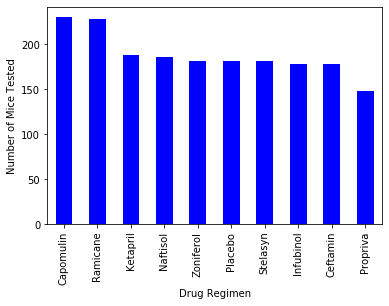

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
b = total_mice.plot.bar(color='b') 
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

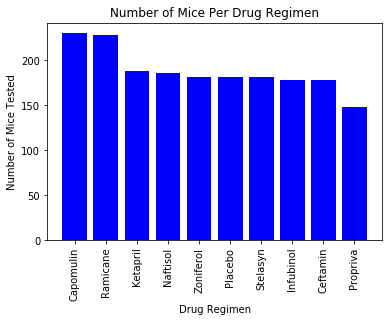

In [39]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = total_mice.index.values
y_axis = total_mice.values
plt.bar(x_axis, y_axis, color="b", align="center")

plt.title("Number of Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

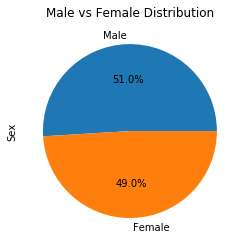

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_df["Sex"].value_counts()
gender.plot.pie(autopct= "%1.1f%%")
plt.title("Male vs Female Distribution")
plt.show

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender = clean_df["Sex"].value_counts()
gender
gender_percent = (clean_df["Sex"].value_counts()/clean_df["Sex"].count().sum()) * 100
gender_percent

Male      50.957447
Female    49.042553
Name: Sex, dtype: float64

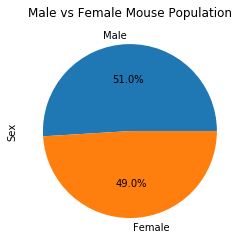

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

In [63]:
clean_df.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [64]:
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]

capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [65]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"] 


In [66]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# CAPOMULIN
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin = pd.DataFrame(capomulin_last)
capomulin_merge_df = pd.merge(capomulin, clean_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge_df.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [72]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
capomulin_tumors = capomulin_merge_df["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [67]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# RAMICANE

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane = pd.DataFrame(ramicane_last)
ramicane_merge_df = pd.merge(ramicane, clean_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [71]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
ramicane_tumors = ramicane_merge_df["Tumor Volume (mm3)"]

quartiles = ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [68]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# INFUBINOL
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol = pd.DataFrame(infubinol_last)
infubinol_merge_df = pd.merge(infubinol, clean_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [73]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
infubinol_tumors = infubinol_merge_df["Tumor Volume (mm3)"]

quartiles = infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [69]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# CEFTAMIN
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin = pd.DataFrame(ceftamin_last)
ceftamin_merge_df = pd.merge(ceftamin, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [74]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
ceftamin_tumors = ceftamin_merge_df["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


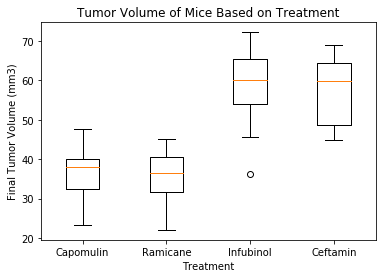

In [79]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_plot = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
Treatment = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice Based on Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Treatment')
ax1.boxplot(box_plot, labels=Treatment, widths = 0.4, vert=True)
plt.show()

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_plot = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
line_plot


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


Text(0, 0.5, 'Tumor Volume (mm3)')

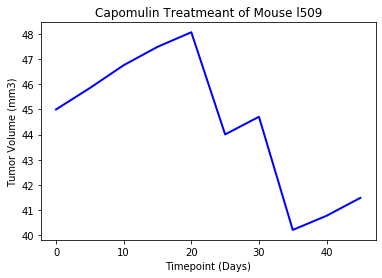

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]
line_plot.head()

x_axis = line_plot["Timepoint"]
tumor = line_plot["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin Treatmeant of Mouse l509')
plt.plot(x_axis, tumor,linewidth=2, color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
